# Week 1 : Assignment

<p align="centre">
<img src="../assets/meme5.jpg" width="400">
</p>

We know it hurts, and the single most thing going on in your head right now is

<p align="centre">
<img src="../assets/meme6.jpeg" width="400">
</p>

But relax! The asssignment questions are fun and easy, unlike your mookit ones. Feel the motive behind the question and use the recently acquired learning of different libraries to ultimately solve them. Stuck on some function? Feel free to google it. But the _**recommended way**_ is to harness the power of Jupyter notebooks!

- Place the cursor inside the parenthesis of the function, say `np.sum()`, hold down shift , and press tab.
- Or type a function name with a question mark after it, like
    ```python
    import numpy as np
    np.sum?
    ```
    
With this little tool kept in mind, let's proceed!

# 1. Python Basics and Numpy 

Use the data from Starfish_Data.csv to find the distance to the [Starfish Cluster](https://en.wikipedia.org/wiki/Messier_38). Also known as M38 or NGC1912, the Starfish Cluster is an open cluster of stars in the constellation Auriga. Read on ahead to find out more about the concepts in astronomy you will need to solve this.

Data downloaded from [VizieR](https://cdsarc.unistra.fr/viz-bin/cat/V/19), from data used in [Piskunov 1980](https://ui.adsabs.harvard.edu/?#abs/1980BICDS..19...67P)

## Distance to Starfish Cluster

Magnitudes are a way to describe how bright an object (in our case, a star) is. It is similar to the decibel system for sound in that magnitudes are logarithmic. They can be calculated according to the formula $$\rm m = -2.5 \log\left(\frac{F}{F_0}\right)$$ where m = apparent magnitude, F is the flux from the star (measured in W m$^{-2}$), and F$_0$ is a reference flux.

Now, we can calculate the flux of a star at some distance d away as $$ F = \frac{L}{4\pi d^2} $$ where L is the Luminosity of the star (measured in W) and d is the distance to the cluster in parsecs.

Using some substitution and rearrangement and taking $L_\odot$ to be the luminosity of the sun  we arrive at the formula: $$ log(d) = \frac{1}{5}[m + 2.5log(\frac{L}{L_\odot}) + 0.17]$$

> The data of Starfish Cluster is provided to you in the following format:

| Column        |        Explanation|
| ------------- |:-------------|
| Vmag          | Apparent Visual Magnitude (as seen from earth) |
| logL          | Logarithm of the Luminosity (in $L_\odot$)|
| Prob          | Probability that the star belongs to the Cluster|



#### You need to find the distance to Starfish Cluster (in parsecs) using the data provided. You can calculate it using the following 2 methods:

  -  Exclude all the stars with low probability of belonging to the cluster, and then calculate distance for each star, and find the mean.
  -  Find the distance for all stars (including the low probability ones) and find the weighted average of the distances, where the weights are the probability.

In [33]:
import numpy as np
import pandas as pd
a= pd.read_csv('Starfish_Data.csv')
p=a['Prob']
a['D']=np.exp((a['#Vmag']+2.5*np.log(a['logL'])+0.17)/5)
a['wm']=a['D']*a['Prob']
distance=np.sum(a['wm'])/np.sum(a['Prob'])
distance

12.61047837754698

# 2. Pandas and Matplotlib

IIT Kanpur achieved a milestone at the Inter-IIT Tech Meet 2021 becoming the first institute to win the prestigious competition for the fourth time, a feat unrivaled so far. Our team comprising of Som, Kartikeya, Varun-1, Gurbaaz, Saad, Varun-2 and Mubashshir represented IITK in the ISRO problem statement and secured the Silver Medal for excellence and third position overall. Our challenge was to design a web based visualization tool for AstroSAT observations. Read more about the problem statement [here](https://interiit-tech.org/events/isro_astrosat).

## Catalog of High and Low Mass X-ray Binaries

Your challenge would be to make a primitive **map of the same catalog** using Matplotlib which will aid Astronomers in their research. You must use Matplotlib and take the help of 'Mollweide' projection which is frequently used in Geography and Astronomy. The world maps you commonly see are in 'Mollweide' projection. A modified version of the same catalog has been provided to you. The coordinates are in ICRS (J2000). 

<p align="centre">
<img src="../assets/img7.jpg" width="400">
</p>


> 1. Show HMXB (High Mass X-Ray Binaries) and (Low Mass X-Ray Binaries) on different subplots
> 2. Show sources observed by AstroSAT (flag = 1) and sources not observed by AstroSAT (flag = 0) on different sublots
> 3. Show a combined plot using different colors or markers

Notice anything interesting about the plot?

### Also find out the number of HMXB and LMXB and the coordinates of 'Granat 1915+105' using Pandas. 

Things to ponder over:
> SIMBAD_Names have been resolved using the coordinates with the help of `astroquery.simbad()` and is accurate upto **2 arcmin**. Do you think this a good resolution or a bad resolution for a catalog? If you think this is a bad resolution, what could be the possible reasons?

You may take the help of the internet (obviously). To get some free codes and a basic idea about how to plot Mollweide projection using Matplotlib you can go through this previous project by one of your mentors Saad who plotted a map of stars using HYG Data [here](https://github.com/saad369/Sky_Chart_from_hygdata).


Number of HMXB= 118 Number of LMXB= 121
ra of Granat 1915+105= 288.8208333 dec of Granat 1915+105= 10.96833333


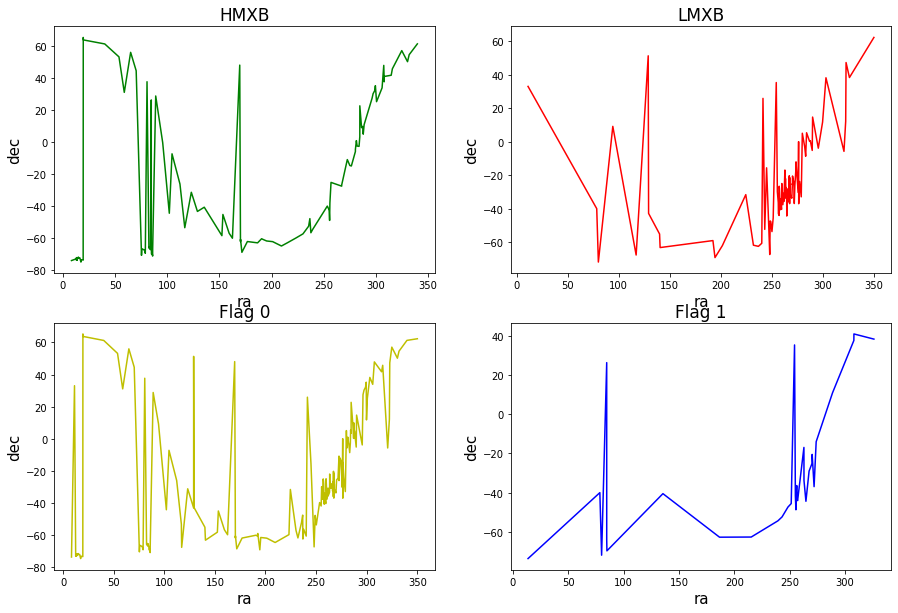

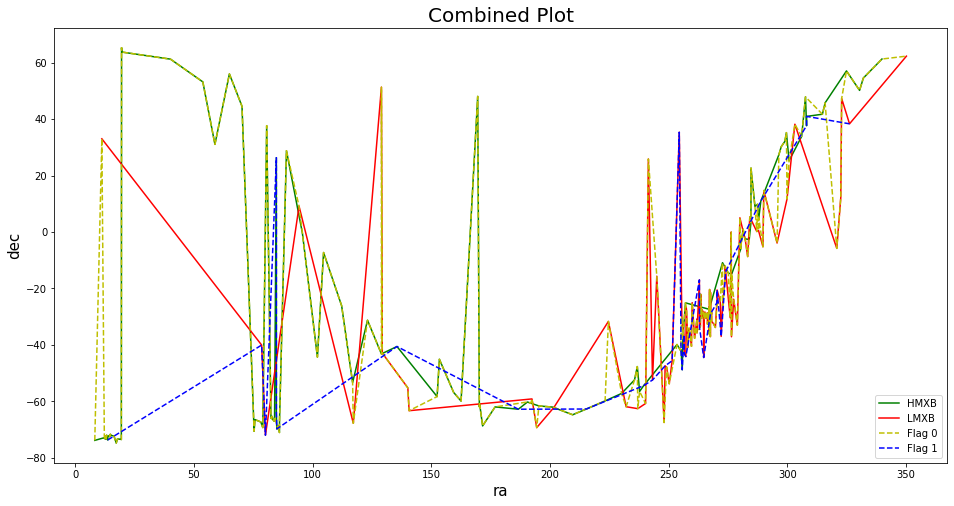

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
a= pd.read_csv('Astrosat_Catalog.csv')
h=a[a['Final_Type']=='HMXB'].reset_index(drop=True)
l=a[a['Final_Type']=='LMXB'].reset_index(drop=True)
f1=a[a['Astrosat_Flag']==1].reset_index(drop=True)
f0=a[a['Astrosat_Flag']==0].reset_index(drop=True)

img = plt.imread("img7.jpg")
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(h['ra'],h['dec'],'g',label='HMXB')
plt.xlabel('ra',size=15)
plt.ylabel('dec',size=15)
plt.title('HMXB',size=17)


plt.subplot(2,2,2)
plt.plot(l['ra'],l['dec'],'r',label='LMXB')
plt.xlabel('ra',size=15)
plt.ylabel('dec',size=15)
plt.title('LMXB',size=17)


plt.subplot(2,2,3)
plt.plot(f0['ra'],f0['dec'],'y',label='Flag 0')
plt.xlabel('ra',size=15)
plt.ylabel('dec',size=15)
plt.title('Flag 0',size=17)

plt.subplot(2,2,4)
plt.plot(f1['ra'],f1['dec'],'b',label='Flag 1')
plt.xlabel('ra',size=15)
plt.ylabel('dec',size=15)
plt.title('Flag 1',size=17)

plt.figure(figsize=(16,8))

plt.title('Combined Plot',size=20)
p1=plt.plot(h['ra'],h['dec'],'g',label='HMXB')
p2=plt.plot(l['ra'],l['dec'],'r',label='LMXB')
p3=plt.plot(f0['ra'],f0['dec'],'y--',label='Flag 0')
p4=plt.plot(f1['ra'],f1['dec'],'b--',label='Flag 1')
plt.xlabel('ra',size=15)
plt.ylabel('dec',size=15)
plt.legend()


print("Number of HMXB=",h['ra'].count(),"Number of LMXB=",l['ra'].count())

b= a[a['SIMBAD_Name']=='Granat 1915+105'].reset_index(drop=True)
print("ra of Granat 1915+105=",b['ra'][0],"dec of Granat 1915+105=",b['dec'][0])